# 1. Connect to google drive and load neccessary libraries

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install scanpy

     |████████████████████████████████| 2.0 MB 1.7 MB/s 
     |████████████████████████████████| 127 kB 63.2 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 1.1 MB 39.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=8ce89742a81fd4b8b18d60154430fa668870a9f60e24ba7ed37c95cfe17d43bf
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=0d9f4e0cd43291708e5b46d5b9ce7c086a920a5840feee983565dcf09998e042
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=0aeec09c120a18afeb158cc8f36c745fe27d3141a4bbac3f903e723e23f4c73a
  Stored in directory: /root/.cache/

In [ ]:
import scanpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Retrieve Converted Data (from .rds to .h5ad)

[Conversions: h5Seurat and AnnData](https://mojaveazure.github.io/seurat-disk/articles/convert-anndata.html) with R (file: convert_rds_to_h5Seurat.R)

In [ ]:
adata = scanpy.read_h5ad('/content/gdrive/MyDrive/Idorsia Capstone Project/data/onco-atlas_v1-final.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 108524 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'publication', 'repository', 'cancer_type', 'cancer_property', 'biopsy_site', 'cell_enrichment', 'patient_id', 'treatment', 'cell_state', 'mitoRatio', 'riboRatio', 'S.Score', 'G2M.Score', 'Phase'
    var: 'features'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'

# 3. Data Exploration

[anndata documentation](https://anndata.readthedocs.io/en/latest/anndata.AnnData.html)

![](https://falexwolf.de/img/scanpy/anndata.svg)



In [ ]:
adata.T

AnnData object with n_obs × n_vars = 3000 × 108524
    obs: 'features'
    var: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'publication', 'repository', 'cancer_type', 'cancer_property', 'biopsy_site', 'cell_enrichment', 'patient_id', 'treatment', 'cell_state', 'mitoRatio', 'riboRatio', 'S.Score', 'G2M.Score', 'Phase'
    obsm: 'HARMONY', 'PCs'
    varm: 'X_harmony', 'X_pca', 'X_umap'

## get scaled count data

In [ ]:
adata.X

array([[-0.1111139 ,  1.5683554 , -0.47214347, ...,  0.21821783,
         1.03274486,  0.05650717],
       [-0.12006346, -0.66672612, -0.4969183 , ..., -1.02270238,
         0.7699052 ,  0.83280223],
       [-0.08975433, -0.42639444, -0.31535507, ..., -0.69492245,
         0.18383655, -0.10130631],
       ...,
       [-0.08304366, -0.5100131 , -0.37690806, ...,  0.28914734,
        -0.866144  ,  0.60498136],
       [-0.09445849,  1.57570733, -0.33926419, ...,  0.45618735,
         0.82567844, -0.71438293],
       [-0.06522343, -0.22657974, -0.13457546, ..., -0.64412926,
        -0.649187  , -0.15242931]])

In [ ]:
len(adata.X)

108524

In [ ]:
len(adata.X[0])

3000

In [ ]:
type(adata.X)

numpy.ndarray

## Annotations of observations

### Cell-level meta data

Simplified observation meta data column values:

- **orig.ident**: Original data repository ID from GEO or ArrayExpress.
- **nCount_RNA**: Number of detected RNA molecules (UMIs).
- **nFeature_RNA**: Number of detected genes.
- **publication**: First author publication reference.
- **repository**: Link to (raw) data repo.
- **cancer_type**: Simplified cancer type name.
- **cancer_property**: Detailed cancer subtype name, where available.
- **biopsy_site**: Source biopsy (currently primary tumor only).
- **cell_enrichment**: Which cell enrichment strategy was used after dissociation. (Here, all cells were computationally subset to immune types)
- **patient_id**: Biosample identifier.
- **treatment**: Patient treatment notes (currently baseline samples only).
- **cell_satate**: Nebion-provided cell type label (simplified).
- **mitoRatio**: Fraction of mitochondrial reads (filtered QC metric).
- **riboRatio**: Fraction of ribosomal protein-coding gene reads (filtered QC metric).
- **S.Score**: S-phase gene marker enrichment score. The higher, the more likely in S phase.
- **G2M.Score**: G2/M-phase gene marker enrichment score. The higher, the more likely in G2/M phase.
- **Phase**: Inferred cell cycle stage.

In [ ]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,publication,repository,cancer_type,cancer_property,biopsy_site,cell_enrichment,patient_id,treatment,cell_state,mitoRatio,riboRatio,S.Score,G2M.Score,Phase
GSM3148575_AAACCTGAGCAGACTG,GSM3148575,3954.0,1633,Azizi,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,breast cancer,ductal and lobular neoplasms_HER2-negative,primary_tumor,CD3,Azizi_BC09,none,CD8 exhausted T-cell (unspecified),0.048558,0.204603,0.049878,-0.055943,S
GSM3148575_AAACCTGAGGTCGGAT,GSM3148575,6230.0,1610,Azizi,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,breast cancer,ductal and lobular neoplasms_HER2-negative,primary_tumor,CD3,Azizi_BC09,none,CD8 T-cell (unspecified),0.038684,0.434831,0.015858,-0.077826,S
GSM3148575_AAACCTGAGTGTACCT,GSM3148575,3988.0,1282,Azizi,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,breast cancer,ductal and lobular neoplasms_HER2-negative,primary_tumor,CD3,Azizi_BC09,none,CD4 regulatory T-cell (unspecified),0.068455,0.395436,0.029705,-0.048898,S
GSM3148575_AAACCTGAGTGTACTC,GSM3148575,3296.0,1417,Azizi,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,breast cancer,ductal and lobular neoplasms_HER2-negative,primary_tumor,CD3,Azizi_BC09,none,CD8 exhausted T-cell (unspecified),0.034587,0.157767,-0.006642,-0.137405,G1
GSM3148575_AAACCTGCAACACCCG,GSM3148575,5716.0,1683,Azizi,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,breast cancer,ductal and lobular neoplasms_HER2-negative,primary_tumor,CD3,Azizi_BC09,none,CD4 naive T-cell,0.077852,0.333450,0.008353,-0.030902,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4143684_TTTGTCAGTCAAACTC,GSM4143684,6405.0,1690,Wu,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,kidney cancer,adenomas and adenocarcinomas,primary_tumor,CD45,Wu_Renal3,none,macrophage,0.068852,0.200937,-0.037913,-0.049019,G1
GSM4143684_TTTGTCATCATCATTC,GSM4143684,2689.0,1073,Wu,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,kidney cancer,adenomas and adenocarcinomas,primary_tumor,CD45,Wu_Renal3,none,CD8 resident memory T-cell,0.075493,0.251395,-0.026747,-0.021344,G1
GSM4143684_TTTGTCATCGTACCGG,GSM4143684,2151.0,972,Wu,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,kidney cancer,adenomas and adenocarcinomas,primary_tumor,CD45,Wu_Renal3,none,B-cell (unspecified),0.059972,0.288238,-0.055606,0.053250,G2M
GSM4143684_TTTGTCATCTCGTATT,GSM4143684,4303.0,1427,Wu,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,kidney cancer,adenomas and adenocarcinomas,primary_tumor,CD45,Wu_Renal3,none,macrophage,0.057402,0.231234,-0.039491,-0.042931,G1


In [ ]:
type(adata.obs)

pandas.core.frame.DataFrame

Interessting columns:
- cancer-type
- cell_state

In [ ]:
adata.obs['cancer_type']

GSM3148575_AAACCTGAGCAGACTG    breast cancer
GSM3148575_AAACCTGAGGTCGGAT    breast cancer
GSM3148575_AAACCTGAGTGTACCT    breast cancer
GSM3148575_AAACCTGAGTGTACTC    breast cancer
GSM3148575_AAACCTGCAACACCCG    breast cancer
                                   ...      
GSM4143684_TTTGTCAGTCAAACTC    kidney cancer
GSM4143684_TTTGTCATCATCATTC    kidney cancer
GSM4143684_TTTGTCATCGTACCGG    kidney cancer
GSM4143684_TTTGTCATCTCGTATT    kidney cancer
GSM4143684_TTTGTCATCTTGCCGT    kidney cancer
Name: cancer_type, Length: 108524, dtype: object

In [ ]:
adata.obs['cell_state']

GSM3148575_AAACCTGAGCAGACTG     CD8 exhausted T-cell (unspecified)
GSM3148575_AAACCTGAGGTCGGAT               CD8 T-cell (unspecified)
GSM3148575_AAACCTGAGTGTACCT    CD4 regulatory T-cell (unspecified)
GSM3148575_AAACCTGAGTGTACTC     CD8 exhausted T-cell (unspecified)
GSM3148575_AAACCTGCAACACCCG                       CD4 naive T-cell
                                              ...                 
GSM4143684_TTTGTCAGTCAAACTC                             macrophage
GSM4143684_TTTGTCATCATCATTC             CD8 resident memory T-cell
GSM4143684_TTTGTCATCGTACCGG                   B-cell (unspecified)
GSM4143684_TTTGTCATCTCGTATT                             macrophage
GSM4143684_TTTGTCATCTTGCCGT                   B-cell (unspecified)
Name: cell_state, Length: 108524, dtype: object

### Cell embeddings / dimensionality reduction

In [ ]:
adata.obsm

AxisArrays with keys: X_harmony, X_pca, X_umap

In [ ]:
adata.obsm['X_pca']

array([[ 6.91873419e+00, -5.43052433e+00, -5.93430358e+00, ...,
        -1.72448876e+00,  7.27860648e-01,  9.59556256e-01],
       [ 6.48109956e+00,  5.91733607e+00, -1.20872195e+00, ...,
        -1.55813675e+00,  5.03435719e-01, -5.45311926e-01],
       [ 5.78886116e+00,  6.83717518e+00, -8.87075492e-01, ...,
         8.86969511e-02, -1.15826676e+00, -1.90612619e-01],
       ...,
       [-3.14248150e+00,  6.17136183e+00,  1.72915681e+00, ...,
        -6.09303993e-01, -1.75129760e-01,  1.01907578e-01],
       [-2.07074541e+01, -4.18684081e+00, -2.99921909e+00, ...,
         3.51156510e-01,  2.73960637e+00, -1.01219106e+00],
       [-5.18090330e+00,  5.88805333e+00,  5.77202624e+00, ...,
         6.14759323e-01, -9.53518155e-03, -1.21993071e+00]])

In [ ]:
type(adata.obsm['X_pca'])

numpy.ndarray

In [ ]:
len(adata.obsm['X_pca'])

108524

In [ ]:
len(adata.obsm['X_pca'][0])

50

In [ ]:
adata.varm

AxisArrays with keys: HARMONY, PCs

## Annotations of Variables / features

### features present in X / genes

In [ ]:
adata.var

,features
PLEKHN1,PLEKHN1
ISG15,ISG15
TNFRSF18,TNFRSF18
TNFRSF4,TNFRSF4
DVL1,DVL1
...,...
MT-ATP6,MT-ATP6
MT-CO3,MT-CO3
MT-ND4,MT-ND4
MT-ND5,MT-ND5


In [ ]:
type(adata.var)

pandas.core.frame.DataFrame

### Features in reductions

In [ ]:
adata.varm

AxisArrays with keys: HARMONY, PCs

In [ ]:
adata.varm_keys

<bound method AnnData.varm_keys of AnnData object with n_obs × n_vars = 108524 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'publication', 'repository', 'cancer_type', 'cancer_property', 'biopsy_site', 'cell_enrichment', 'patient_id', 'treatment', 'cell_state', 'mitoRatio', 'riboRatio', 'S.Score', 'G2M.Score', 'Phase'
    var: 'features'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'>

In [ ]:
adata.varm['PCs']

array([[ 0.01182875, -0.02850523, -0.00931531, ...,  0.03772039,
        -0.05767877,  0.01351571],
       [ 0.00392518, -0.01315974, -0.04279354, ..., -0.02276469,
        -0.02316298, -0.00767314],
       [ 0.01324479, -0.03808797, -0.02040662, ..., -0.01266344,
        -0.06084279,  0.0198355 ],
       ...,
       [ 0.02418276, -0.01008906, -0.02715921, ...,  0.00953314,
         0.01007718, -0.02552601],
       [ 0.00139746, -0.00437605,  0.00301013, ...,  0.0087902 ,
        -0.00196327,  0.00581542],
       [-0.00032002, -0.00541723,  0.0079572 , ..., -0.00311599,
         0.00685966,  0.01199005]])

In [ ]:
len(adata.varm['PCs'])

3000

In [ ]:
len(adata.varm['PCs'][0])

50

In [ ]:
type(adata.varm['PCs'])

numpy.ndarray

## Class Imbalance

In [ ]:
value_count_tumor = adata.obs['cancer_type'].value_counts()
value_count_tumor

<bound method Series.reset_index of lung cancer          38204
breast cancer        26410
skin cancer          23955
colorectal cancer    10712
kidney cancer         9243
Name: cancer_type, dtype: int64>

In [ ]:
value_count_cell_state = adata.obs['cell_state'].value_counts()
type(value_count_cell_state)

pandas.core.series.Series

In [ ]:
celltype_count = pd.DataFrame({'count': value_count_cell_state})
celltype_count['percentage'] = celltype_count['count'].apply(lambda row: row/sum(celltype_count['count'])*100)
celltype_count

,count,percentage
CD4 naive T-cell,11552,10.644650
CD4 regulatory T-cell (unspecified),11249,10.365449
CD8 effector memory T-cell,9667,8.907707
CD4 helper T-cell (unspecified),8010,7.380856
CD8 memory T-cell (unspecified),7183,6.618812
CD4 follicular helper T-cell,6749,6.218901
CD8 T-cell (unspecified),5490,5.058789
CD8 resident memory T-cell,5466,5.036674
B-cell (unspecified),5134,4.730751
CD8 activated T-cell (unspecified),4903,4.517895


# 4. Create Dataframes

##  Combine Feature Lists and Index from obs Data

In [ ]:
feature_list = list(adata.var['features']) # gene names
index_list = list(adata.obs.index)

df_count = pd.DataFrame(adata.X, columns=feature_list, index=index_list)
df_count.head() # df with scaled count data

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
GSM3148575_AAACCTGAGCAGACTG,-0.111114,1.568355,-0.472143,-0.423873,-0.101434,-0.402733,-0.337112,-0.246458,-0.365898,-0.296969,-0.113368,1.767799,-0.254164,-0.443284,-0.312508,0.793847,-0.394700,-0.361574,2.869029,-0.116924,-0.308292,2.324181,-0.176640,-0.132182,1.404549,-0.286983,-0.272951,-0.408260,2.036430,-0.207890,-0.347034,-0.181992,-0.191315,2.223310,-0.139423,-0.297998,-0.412747,-0.294673,-0.362942,-0.308860,...,-0.524959,-0.369832,-0.256198,-0.127658,-0.327378,-0.279738,-0.013096,-0.191058,-0.214528,-0.218297,-0.727390,-0.327620,-0.352140,-0.146363,-0.574222,-0.261240,-0.229400,0.148100,-0.353506,-0.443469,-0.381012,-0.364033,-0.209925,-0.911390,0.457651,5.566921,-0.195043,-0.154481,-0.318882,-0.226725,-0.375075,-0.064847,-0.846254,0.081533,0.763551,0.091451,0.275325,0.218218,1.032745,0.056507
GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,-0.270848,-0.107915,-0.511503,-0.277814,-0.462453,-0.301821,-0.231361,-0.385800,1.894113,-0.409136,-0.109023,2.349367,-0.435257,-0.191539,-0.136378,-0.744321,2.390128,-0.294596,-0.378270,-0.488496,-0.214503,-0.341572,-0.187895,-0.198950,-0.382059,-0.128542,-0.316360,-0.427453,-0.296122,-0.351139,0.940758,...,-0.531881,-0.373371,-0.317720,-0.146983,-0.368192,-0.313880,-0.352356,-0.183203,-0.200532,-0.435039,-0.778602,-0.322719,-0.392403,-0.144354,1.709019,-0.244584,-0.330453,-0.207097,-0.389824,-0.495193,-0.413506,-0.380598,-0.215174,0.413374,0.562191,-0.152656,-0.198916,-0.165524,-0.311806,-0.194028,-0.357682,0.758289,0.298942,-0.276559,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802
GSM3148575_AAACCTGAGTGTACCT,-0.089754,-0.426394,-0.315355,-0.266967,-0.116696,-0.385388,-0.299696,-0.257290,-0.327043,-0.311192,-0.103699,-0.473130,-0.208214,-0.335444,2.817336,-1.061345,-0.366972,-0.335836,-0.299577,8.517665,-0.280628,-0.370792,-0.213133,-0.163473,-0.643370,-0.309903,-0.321763,-0.411400,-0.416374,-0.192364,-0.345739,-0.172169,-0.188570,2.194924,-0.132663,-0.291187,2.154897,-0.264132,-0.369451,1.020385,...,-0.392792,-0.317485,-0.307343,-0.147237,-0.364208,-0.246058,-1.117234,-0.176539,-0.200422,-0.322816,1.030280,-0.267011,-0.356000,-0.126872,-0.585948,-0.274986,-0.311587,0.246369,-0.307840,-0.330571,-0.306284,-0.278537,-0.177270,-0.874871,-0.957305,-0.177620,-0.210931,-0.162923,-0.330722,-0.231841,-0.362325,0.081777,-0.336891,0.328935,-0.856581,-0.838144,-0.105070,-0.694922,0.183837,-0.101306
GSM3148575_AAACCTGAGTGTACTC,-0.125882,1.693439,-0.466246,-0.463509,-0.090135,-0.383227,3.065477,-0.240090,-0.350679,-0.264850,-0.131336,-0.512974,-0.147036,-0.481005,-0.302602,1.375467,-0.421251,-0.371076,-0.356015,-0.119130,-0.341302,-0.432896,-0.172046,-0.118656,-0.733424,-0.291346,-0.294906,-0.360475,-0.373496,-0.188546,-0.311027,5.823911,-0.194542,-0.359327,-0.128408,-0.282225,-0.374690,-0.280225,-0.304369,-1.307005,...,-0.503293,2.710692,-0.264959,-0.113735,-0.302742,-0.294022,0.725365,-0.198581,-0.196791,-0.222877,-0.710246,-0.281901,-0.356936,-0.083812,-0.572522,-0.231843,-0.258337,0.370442,-0.414121,-0.497639,-0.394664,-0.405874,-0.190823,1.461243,1.552454,-0.156890,-0.199701,-0.151728,-0.308561,-0.158232,-0.382653,0.063217,-2.449861,1.105190,0.720020,-0.983937,1.177727,-1.270444,1.191090,-0.057102
GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.253885,-0.292382,-0.313821,-0.088790,-0.466089,-0.226714,-0.270607,-0.353075,0.574824,-0.335640,-0.314195,-0.323180,-0

In [ ]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108524 entries, GSM3148575_AAACCTGAGCAGACTG to GSM4143684_TTTGTCATCTTGCCGT
Columns: 3000 entries, PLEKHN1 to MT-CYB
dtypes: float64(3000)
memory usage: 2.4+ GB


In [ ]:
#df_count.to_csv('count_data.csv')

##  Combine Gean Features and Obs DataSet

In [ ]:
df_all = pd.concat([df_count, adata.obs], axis=1)
df_all.head() # df for all genes ans all obs columns

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,orig.ident,nCount_RNA,nFeature_RNA,publication,repository,cancer_type,cancer_property,biopsy_site,cell_enrichment,patient_id,treatment,cell_state,mitoRatio,riboRatio,S.Score,G2M.Score,Phase
GSM3148575_AAACCTGAGCAGACTG,-0.111114,1.568355,-0.472143,-0.423873,-0.101434,-0.402733,-0.337112,-0.246458,-0.365898,-0.296969,-0.113368,1.767799,-0.254164,-0.443284,-0.312508,0.793847,-0.394700,-0.361574,2.869029,-0.116924,-0.308292,2.324181,-0.176640,-0.132182,1.404549,-0.286983,-0.272951,-0.408260,2.036430,-0.207890,-0.347034,-0.181992,-0.191315,2.223310,-0.139423,-0.297998,-0.412747,-0.294673,-0.362942,-0.308860,...,0.148100,-0.353506,-0.443469,-0.381012,-0.364033,-0.209925,-0.911390,0.457651,5.566921,-0.195043,-0.154481,-0.318882,-0.226725,-0.375075,-0.064847,-0.846254,0.081533,0.763551,0.091451,0.275325,0.218218,1.032745,0.056507,GSM3148575,3954.0,1633,Azizi,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,breast cancer,ductal and lobular neoplasms_HER2-negative,primary_tumor,CD3,Azizi_BC09,none,CD8 exhausted T-cell (unspecified),0.048558,0.204603,0.049878,-0.055943,S
GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,-0.270848,-0.107915,-0.511503,-0.277814,-0.462453,-0.301821,-0.231361,-0.385800,1.894113,-0.409136,-0.109023,2.349367,-0.435257,-0.191539,-0.136378,-0.744321,2.390128,-0.294596,-0.378270,-0.488496,-0.214503,-0.341572,-0.187895,-0.198950,-0.382059,-0.128542,-0.316360,-0.427453,-0.296122,-0.351139,0.940758,...,-0.207097,-0.389824,-0.495193,-0.413506,-0.380598,-0.215174,0.413374,0.562191,-0.152656,-0.198916,-0.165524,-0.311806,-0.194028,-0.357682,0.758289,0.298942,-0.276559,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,GSM3148575,6230.0,1610,Azizi,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,breast cancer,ductal and lobular neoplasms_HER2-negative,primary_tumor,CD3,Azizi_BC09,none,CD8 T-cell (unspecified),0.038684,0.434831,0.015858,-0.077826,S
GSM3148575_AAACCTGAGTGTACCT,-0.089754,-0.426394,-0.315355,-0.266967,-0.116696,-0.385388,-0.299696,-0.257290,-0.327043,-0.311192,-0.103699,-0.473130,-0.208214,-0.335444,2.817336,-1.061345,-0.366972,-0.335836,-0.299577,8.517665,-0.280628,-0.370792,-0.213133,-0.163473,-0.643370,-0.309903,-0.321763,-0.411400,-0.416374,-0.192364,-0.345739,-0.172169,-0.188570,2.194924,-0.132663,-0.291187,2.154897,-0.264132,-0.369451,1.020385,...,0.246369,-0.307840,-0.330571,-0.306284,-0.278537,-0.177270,-0.874871,-0.957305,-0.177620,-0.210931,-0.162923,-0.330722,-0.231841,-0.362325,0.081777,-0.336891,0.328935,-0.856581,-0.838144,-0.105070,-0.694922,0.183837,-0.101306,GSM3148575,3988.0,1282,Azizi,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,breast cancer,ductal and lobular neoplasms_HER2-negative,primary_tumor,CD3,Azizi_BC09,none,CD4 regulatory T-cell (unspecified),0.068455,0.395436,0.029705,-0.048898,S
GSM3148575_AAACCTGAGTGTACTC,-0.125882,1.693439,-0.466246,-0.463509,-0.090135,-0.383227,3.065477,-0.240090,-0.350679,-0.264850,-0.131336,-0.512974,-0.147036,-0.481005,-0.302602,1.375467,-0.421251,-0.371076,-0.356015,-0.119130,-0.341302,-0.432896,-0.172046,-0.118656,-0.733424,-0.291346,-0.294906,-0.360475,-0.373496,-0.188546,-0.311027,5.823911,-0.194542,-0.359327,-0.128408,-0.282225,-0.374690,-0.280225,-0.304369,-1.307005,...,0.370442,-0.414121,-0.497639,-0.394664,-0.405874,-0.190823,1.461243,1.552454,-0.156890,-0.199701,-0.151728,-0.308561,-0.158232,-0.382653,0.063217,-2.449861,1.105190,0.720020,-0.983937,1.177727,-1.270444,1.191090,-0.057102,GSM3148575,3296.0,1417,Azizi,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,breast c

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108524 entries, GSM3148575_AAACCTGAGCAGACTG to GSM4143684_TTTGTCATCTTGCCGT
Columns: 3017 entries, PLEKHN1 to Phase
dtypes: float64(3005), int32(1), object(11)
memory usage: 2.4+ GB


In [ ]:
#df_all.to_csv('count_and_feature_data.csv')

## Combine Gene Table and Cancer Types and Cell State

In [ ]:
obs_needed = adata.obs[['cancer_type', 'cell_state']]

df_needed = pd.concat([df_count, obs_needed], axis=1)
df_needed.head() # df with all genes and cell_state and cancer_type column of adata.obs

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cancer_type,cell_state
GSM3148575_AAACCTGAGCAGACTG,-0.111114,1.568355,-0.472143,-0.423873,-0.101434,-0.402733,-0.337112,-0.246458,-0.365898,-0.296969,-0.113368,1.767799,-0.254164,-0.443284,-0.312508,0.793847,-0.394700,-0.361574,2.869029,-0.116924,-0.308292,2.324181,-0.176640,-0.132182,1.404549,-0.286983,-0.272951,-0.408260,2.036430,-0.207890,-0.347034,-0.181992,-0.191315,2.223310,-0.139423,-0.297998,-0.412747,-0.294673,-0.362942,-0.308860,...,-0.256198,-0.127658,-0.327378,-0.279738,-0.013096,-0.191058,-0.214528,-0.218297,-0.727390,-0.327620,-0.352140,-0.146363,-0.574222,-0.261240,-0.229400,0.148100,-0.353506,-0.443469,-0.381012,-0.364033,-0.209925,-0.911390,0.457651,5.566921,-0.195043,-0.154481,-0.318882,-0.226725,-0.375075,-0.064847,-0.846254,0.081533,0.763551,0.091451,0.275325,0.218218,1.032745,0.056507,breast cancer,CD8 exhausted T-cell (unspecified)
GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,-0.270848,-0.107915,-0.511503,-0.277814,-0.462453,-0.301821,-0.231361,-0.385800,1.894113,-0.409136,-0.109023,2.349367,-0.435257,-0.191539,-0.136378,-0.744321,2.390128,-0.294596,-0.378270,-0.488496,-0.214503,-0.341572,-0.187895,-0.198950,-0.382059,-0.128542,-0.316360,-0.427453,-0.296122,-0.351139,0.940758,...,-0.317720,-0.146983,-0.368192,-0.313880,-0.352356,-0.183203,-0.200532,-0.435039,-0.778602,-0.322719,-0.392403,-0.144354,1.709019,-0.244584,-0.330453,-0.207097,-0.389824,-0.495193,-0.413506,-0.380598,-0.215174,0.413374,0.562191,-0.152656,-0.198916,-0.165524,-0.311806,-0.194028,-0.357682,0.758289,0.298942,-0.276559,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,breast cancer,CD8 T-cell (unspecified)
GSM3148575_AAACCTGAGTGTACCT,-0.089754,-0.426394,-0.315355,-0.266967,-0.116696,-0.385388,-0.299696,-0.257290,-0.327043,-0.311192,-0.103699,-0.473130,-0.208214,-0.335444,2.817336,-1.061345,-0.366972,-0.335836,-0.299577,8.517665,-0.280628,-0.370792,-0.213133,-0.163473,-0.643370,-0.309903,-0.321763,-0.411400,-0.416374,-0.192364,-0.345739,-0.172169,-0.188570,2.194924,-0.132663,-0.291187,2.154897,-0.264132,-0.369451,1.020385,...,-0.307343,-0.147237,-0.364208,-0.246058,-1.117234,-0.176539,-0.200422,-0.322816,1.030280,-0.267011,-0.356000,-0.126872,-0.585948,-0.274986,-0.311587,0.246369,-0.307840,-0.330571,-0.306284,-0.278537,-0.177270,-0.874871,-0.957305,-0.177620,-0.210931,-0.162923,-0.330722,-0.231841,-0.362325,0.081777,-0.336891,0.328935,-0.856581,-0.838144,-0.105070,-0.694922,0.183837,-0.101306,breast cancer,CD4 regulatory T-cell (unspecified)
GSM3148575_AAACCTGAGTGTACTC,-0.125882,1.693439,-0.466246,-0.463509,-0.090135,-0.383227,3.065477,-0.240090,-0.350679,-0.264850,-0.131336,-0.512974,-0.147036,-0.481005,-0.302602,1.375467,-0.421251,-0.371076,-0.356015,-0.119130,-0.341302,-0.432896,-0.172046,-0.118656,-0.733424,-0.291346,-0.294906,-0.360475,-0.373496,-0.188546,-0.311027,5.823911,-0.194542,-0.359327,-0.128408,-0.282225,-0.374690,-0.280225,-0.304369,-1.307005,...,-0.264959,-0.113735,-0.302742,-0.294022,0.725365,-0.198581,-0.196791,-0.222877,-0.710246,-0.281901,-0.356936,-0.083812,-0.572522,-0.231843,-0.258337,0.370442,-0.414121,-0.497639,-0.394664,-0.405874,-0.190823,1.461243,1.552454,-0.156890,-0.199701,-0.151728,-0.308561,-0.158232,-0.382653,0.063217,-2.449861,1.105190,0.720020,-0.983937,1.177727,-1.270444,1.191090,-0.057102,breast cancer,CD8 exhausted T-cell (unspecified)
GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.2

In [ ]:
df_needed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108524 entries, GSM3148575_AAACCTGAGCAGACTG to GSM4143684_TTTGTCATCTTGCCGT
Columns: 3002 entries, PLEKHN1 to cell_state
dtypes: float64(3000), object(2)
memory usage: 2.4+ GB


In [ ]:
#df_needed.to_csv('count_celltype_cancer_data.csv')

## Combine PCA Features with Cell State

In [ ]:
adata.varm_keys

<bound method AnnData.varm_keys of AnnData object with n_obs × n_vars = 108524 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'publication', 'repository', 'cancer_type', 'cancer_property', 'biopsy_site', 'cell_enrichment', 'patient_id', 'treatment', 'cell_state', 'mitoRatio', 'riboRatio', 'S.Score', 'G2M.Score', 'Phase'
    var: 'features'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'>

In [ ]:
feature_list = [str(i) for i in range(1,51)]
index_list = list(adata.obs.index)

In [ ]:
df_pca = pd.DataFrame(adata.obsm['X_pca'], columns=feature_list, index=index_list)
df_pca.head() # df with dimensionality reduced pca data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
GSM3148575_AAACCTGAGCAGACTG,6.918734,-5.430524,-5.934304,-5.132598,1.257261,-4.486886,-0.617733,-0.260068,-1.264563,3.596646,2.086040,1.914667,4.873919,-0.369806,-0.925603,1.311917,0.925094,0.120551,1.124421,1.906007,1.226803,0.643076,2.262795,1.109645,-0.190924,2.457812,-2.650853,0.281783,-1.228190,1.024622,-0.403749,0.395911,-0.134256,-1.001416,2.710131,2.867136,-0.052171,-1.017120,0.970193,1.078939,0.763181,-0.974815,0.304716,2.475712,-0.227740,1.089021,-1.379492,-1.724489,0.727861,0.959556
GSM3148575_AAACCTGAGGTCGGAT,6.481100,5.917336,-1.208722,0.790335,-5.729861,-0.235486,-0.798798,-1.673697,0.992981,2.014384,1.197686,3.126476,2.299061,-1.529358,0.477961,-1.135993,2.339923,0.873401,0.002629,1.755137,-1.014675,1.753415,-0.149313,-0.458066,-0.796815,-1.306341,-0.335694,-0.160202,-0.239191,-0.679422,0.199933,-0.826625,-1.970399,-0.613103,-0.389284,-1.541020,0.195096,-0.834788,-1.085860,0.075480,-0.421840,-1.777539,1.433072,0.176093,0.292241,0.198317,-1.676759,-1.558137,0.503436,-0.545312
GSM3148575_AAACCTGAGTGTACCT,5.788861,6.837175,-0.887075,5.646618,0.523669,-1.265495,-2.007347,-2.527674,0.265183,-1.956149,-1.198070,0.801297,-0.911915,-0.998997,-2.779241,-2.369006,1.254288,1.719373,0.718629,-0.177771,-0.804413,1.009628,1.237071,1.228712,0.633373,1.198361,-0.295055,-0.885894,1.111512,0.941895,0.721014,-1.297449,0.190606,0.974933,-0.546057,0.631332,-0.102032,-1.091253,-1.079537,-0.659000,-1.234536,-1.315012,-0.349012,0.262349,2.020753,1.190537,0.790291,0.088697,-1.158267,-0.190613
GSM3148575_AAACCTGAGTGTACTC,5.108254,-7.165000,-8.003197,-6.768706,3.072275,-2.210504,-0.178368,1.110728,3.006974,-1.685400,1.482924,0.795629,3.881558,-0.393929,-0.862719,3.387931,0.666578,-2.843199,1.042368,4.187947,-0.359032,0.731889,0.669591,3.103710,-1.950703,1.757820,-2.452799,0.704643,-2.356638,1.939687,1.132096,0.551286,-1.746684,0.092801,1.380779,-1.638370,-1.705521,-0.729765,2.299366,1.412258,1.045634,1.368334,1.171300,1.354746,-1.115841,0.397382,-0.240331,-0.744143,-0.891667,0.930065
GSM3148575_AAACCTGCAACACCCG,11.084245,1.923271,-1.023140,8.029376,-2.299359,2.284066,-6.615127,-2.620251,-4.312167,0.839962,-0.770186,0.829490,2.489371,-1.581365,0.143728,1.558536,2.591930,1.499460,-0.846908,-0.946084,0.991319,0.979579,0.593032,3.374414,0.504460,0.188853,-0.415865,-1.216265,-0.532730,0.123159,0.259860,-1.989235,-0.896384,-0.197704,1.172842,1.311405,1.824415,0.998337,-1.210659,0.074916,-2.456988,-1.737955,-2.472423,-2.025937,1.706594,-0.141557,0.035906,1.043848,-0.449964,0.860397


In [ ]:
cell_state = adata.obs[['cell_state']]

df_pca = pd.concat([df_pca, cell_state], axis=1)
df_pca.head() # df with all genes and cell_state and cancer_type column of adata.obs

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,cell_state
GSM3148575_AAACCTGAGCAGACTG,6.918734,-5.430524,-5.934304,-5.132598,1.257261,-4.486886,-0.617733,-0.260068,-1.264563,3.596646,2.086040,1.914667,4.873919,-0.369806,-0.925603,1.311917,0.925094,0.120551,1.124421,1.906007,1.226803,0.643076,2.262795,1.109645,-0.190924,2.457812,-2.650853,0.281783,-1.228190,1.024622,-0.403749,0.395911,-0.134256,-1.001416,2.710131,2.867136,-0.052171,-1.017120,0.970193,1.078939,0.763181,-0.974815,0.304716,2.475712,-0.227740,1.089021,-1.379492,-1.724489,0.727861,0.959556,CD8 exhausted T-cell (unspecified)
GSM3148575_AAACCTGAGGTCGGAT,6.481100,5.917336,-1.208722,0.790335,-5.729861,-0.235486,-0.798798,-1.673697,0.992981,2.014384,1.197686,3.126476,2.299061,-1.529358,0.477961,-1.135993,2.339923,0.873401,0.002629,1.755137,-1.014675,1.753415,-0.149313,-0.458066,-0.796815,-1.306341,-0.335694,-0.160202,-0.239191,-0.679422,0.199933,-0.826625,-1.970399,-0.613103,-0.389284,-1.541020,0.195096,-0.834788,-1.085860,0.075480,-0.421840,-1.777539,1.433072,0.176093,0.292241,0.198317,-1.676759,-1.558137,0.503436,-0.545312,CD8 T-cell (unspecified)
GSM3148575_AAACCTGAGTGTACCT,5.788861,6.837175,-0.887075,5.646618,0.523669,-1.265495,-2.007347,-2.527674,0.265183,-1.956149,-1.198070,0.801297,-0.911915,-0.998997,-2.779241,-2.369006,1.254288,1.719373,0.718629,-0.177771,-0.804413,1.009628,1.237071,1.228712,0.633373,1.198361,-0.295055,-0.885894,1.111512,0.941895,0.721014,-1.297449,0.190606,0.974933,-0.546057,0.631332,-0.102032,-1.091253,-1.079537,-0.659000,-1.234536,-1.315012,-0.349012,0.262349,2.020753,1.190537,0.790291,0.088697,-1.158267,-0.190613,CD4 regulatory T-cell (unspecified)
GSM3148575_AAACCTGAGTGTACTC,5.108254,-7.165000,-8.003197,-6.768706,3.072275,-2.210504,-0.178368,1.110728,3.006974,-1.685400,1.482924,0.795629,3.881558,-0.393929,-0.862719,3.387931,0.666578,-2.843199,1.042368,4.187947,-0.359032,0.731889,0.669591,3.103710,-1.950703,1.757820,-2.452799,0.704643,-2.356638,1.939687,1.132096,0.551286,-1.746684,0.092801,1.380779,-1.638370,-1.705521,-0.729765,2.299366,1.412258,1.045634,1.368334,1.171300,1.354746,-1.115841,0.397382,-0.240331,-0.744143,-0.891667,0.930065,CD8 exhausted T-cell (unspecified)
GSM3148575_AAACCTGCAACACCCG,11.084245,1.923271,-1.023140,8.029376,-2.299359,2.284066,-6.615127,-2.620251,-4.312167,0.839962,-0.770186,0.829490,2.489371,-1.581365,0.143728,1.558536,2.591930,1.499460,-0.846908,-0.946084,0.991319,0.979579,0.593032,3.374414,0.504460,0.188853,-0.415865,-1.216265,-0.532730,0.123159,0.259860,-1.989235,-0.896384,-0.197704,1.172842,1.311405,1.824415,0.998337,-1.210659,0.074916,-2.456988,-1.737955,-2.472423,-2.025937,1.706594,-0.141557,0.035906,1.043848,-0.449964,0.860397,CD4 naive T-cell


In [ ]:
df_pca.to_csv('pca_data.csv')

# 4. Data Visualisation

## Class Imbalance Bar Plot

In [ ]:
value_count_cell_state

CD4 naive T-cell                                11552
CD4 regulatory T-cell (unspecified)             11249
CD8 effector memory T-cell                       9667
CD4 helper T-cell (unspecified)                  8010
CD8 memory T-cell (unspecified)                  7183
CD4 follicular helper T-cell                     6749
CD8 T-cell (unspecified)                         5490
CD8 resident memory T-cell                       5466
B-cell (unspecified)                             5134
CD8 activated T-cell (unspecified)               4903
macrophage                                       4523
plasma cell                                      3073
CD8 exhausted T-cell (unspecified)               3047
natural killer cell                              2593
CD8 exhausted resident memory T-cell             1932
NK T-cell (unspecified)                          1729
Th17 T-cell                                      1684
M2 macrophage                                    1290
CD8 cytotoxic T-cell (unspec

In [ ]:
value_count_cell_state.index

Index(['CD4 naive T-cell', 'CD4 regulatory T-cell (unspecified)',
       'CD8 effector memory T-cell', 'CD4 helper T-cell (unspecified)',
       'CD8 memory T-cell (unspecified)', 'CD4 follicular helper T-cell',
       'CD8 T-cell (unspecified)', 'CD8 resident memory T-cell',
       'B-cell (unspecified)', 'CD8 activated T-cell (unspecified)',
       'macrophage', 'plasma cell', 'CD8 exhausted T-cell (unspecified)',
       'natural killer cell', 'CD8 exhausted resident memory T-cell',
       'NK T-cell (unspecified)', 'Th17 T-cell', 'M2 macrophage',
       'CD8 cytotoxic T-cell (unspecified)', 'classical monocyte',
       'CD4 T-cell (unspecified)', 'GC-dependent memory B-cell',
       'T-cell (unspecified)', 'non-classical monocyte', 'lymphocyte',
       'naive B-cell', 'granulocyte', 'conventional dendritic cell',
       'CD8 exhausted cytotoxic T-cell (unspecified)', 'mast cell',
       'conventional dendritic cell 2', 'plasmacytoid dendritic cell',
       'dendritic cell', 'CD8 nai

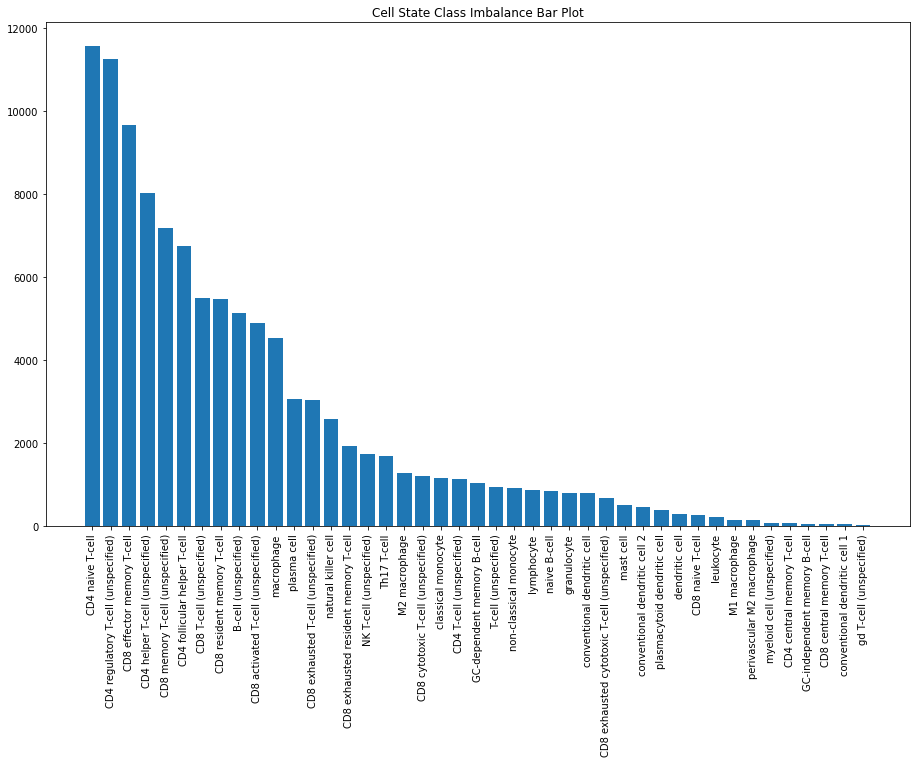

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(value_count_cell_state.index,value_count_cell_state)
plt.xticks(rotation=90)
plt.title("Cell State Class Imbalance Bar Plot")
plt.show()

plt.savefig('CellStateBarPlot.png')
plt.savefig('CellStateBarPlot.pdf')

## Correlation Heatmap

In [ ]:
# r = df_count.corr() # takes about 33 minutes
# r.to_csv("correlation.csv")

In [ ]:
correlation = pd.read_csv('/content/gdrive/MyDrive/Idorsia Capstone Project/data/correlation.csv', index_col=0)

In [ ]:
correlation

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
PLEKHN1,1.000000,0.030653,0.038683,0.028441,0.001479,-0.000065,0.003827,0.002913,0.001962,-0.004144,-0.001393,0.012349,0.011129,0.021131,0.003332,0.019251,-0.000150,0.004306,0.005440,0.006570,0.012965,0.014876,-0.001295,-0.004309,0.014058,0.000190,0.007271,0.003366,0.003599,0.002245,-0.003483,0.000204,0.003326,0.003124,-0.001933,0.006325,0.007306,0.015348,0.010165,-0.015946,...,0.015252,0.010648,-0.008336,0.000080,-0.002183,-0.002831,0.004818,0.007370,-0.003487,-0.008691,0.012058,0.002304,0.008158,0.000227,0.001627,-0.003057,-0.011125,0.010510,0.016945,0.034069,0.004972,0.015739,0.001963,0.008787,0.008107,-0.003579,-0.003491,0.001570,0.002128,-0.000661,0.005554,-0.001087,0.015422,0.015245,-0.000140,-0.009116,0.001509,0.012679,-0.002659,0.004425
ISG15,0.030653,1.000000,0.085413,0.077599,0.004470,0.008460,0.015762,-0.002363,0.022883,0.020715,0.007062,0.038818,0.047182,0.042899,-0.003864,0.094218,0.021885,0.025131,0.027421,0.012981,0.017222,0.056666,0.009577,0.002019,0.108841,0.006092,-0.008958,0.012967,0.055793,0.022119,0.009491,0.011646,0.013582,0.025496,0.004048,0.045965,0.014684,0.033554,0.035812,-0.071971,...,0.050199,0.047716,-0.008895,-0.000764,0.013781,0.007962,0.075983,0.001836,0.011923,-0.029069,0.050962,0.042658,0.018577,0.004206,-0.008886,0.006428,0.018144,0.033056,0.200237,0.330550,0.049761,0.052914,0.009301,0.062509,0.051253,0.000608,-0.001239,0.004607,0.008468,0.005186,0.029420,0.031819,-0.027927,0.002927,-0.047407,-0.065778,-0.018155,-0.068957,0.002797,-0.044573
TNFRSF18,0.038683,0.085413,1.000000,0.625515,0.005523,0.045580,0.001876,0.012682,0.016189,0.016598,-0.000754,0.040314,0.055167,0.256311,-0.004898,0.197492,-0.019472,0.029549,-0.021733,0.021068,-0.004345,0.009571,-0.013740,0.001569,0.282334,-0.009636,-0.053350,0.053040,0.079554,0.025786,0.040514,0.017550,0.028553,0.040068,0.000541,0.073944,0.072106,0.054043,0.118113,-0.129963,...,0.130514,0.045463,-0.011033,-0.007644,0.078558,0.126175,0.234734,0.019556,0.029959,-0.056354,0.204628,0.122407,0.034704,0.085536,-0.015164,0.003856,-0.049911,0.116877,-0.030230,0.046004,0.042058,0.095189,0.018407,0.020536,0.005730,-0.000888,-0.019308,0.013500,0.028452,-0.003389,0.017327,-0.069480,-0.057765,0.097244,0.060008,0.100176,0.006751,-0.071764,0.060717,0.043839
TNFRSF4,0.028441,0.077599,0.625515,1.000000,-0.000644,0.048472,-0.006072,0.010706,0.017043,-0.001305,-0.006477,0.036569,0.032310,0.273704,0.014301,0.157028,-0.025334,0.025753,-0.014796,-0.004472,-0.011431,-0.002635,-0.013001,-0.002668,0.261021,0.000275,-0.044083,0.051637,0.054318,0.030117,0.033539,0.016985,0.028968,0.048045,0.002565,0.089749,0.068741,0.051778,0.101361,-0.055399,...,0.108654,0.047246,0.010663,-0.005503,0.072991,0.154756,0.252321,0.016331,0.027723,-0.046106,0.178677,0.110057,0.038886,0.077455,-0.008957,-0.000076,-0.058519,0.089487,-0.003437,0.057533,0.034479,0.092619,0.016337,0.017504,-0.002224,0.003527,-0.014243,0.010854,0.023565,-0.005537,0.015390,-0.053092,-0.068551,0.088368,0.058244,0.063818,0.026315,-0.118989,0.066741,0.070267
DVL1,0.001479,0.004470,0.005523,-0.000644,1.000000,0.008874,0.003797,0.002607,0.008215,0.012817,-0.003819,0.001603,0.004902,0.000523,0.004524,0.013038,-0.001170,0.000560,-0.004271,-0.003419,-0.000491,-0.005336,0.008848,0.003023,0.013660,-0.000035,-0.004521,0.004170,0.013544,0.007836,0.012064,-0.002721,0.001283,0.013205,0.010449,0.006296,0.004863,0.005553,-0.001192,-0.026643,...,-0.002531,0.000982,0.009754,-0.006374,0.011765,0.005426,0.003545,0.001853,0.010920,0.008291,0.012944

### cut off: 0.6

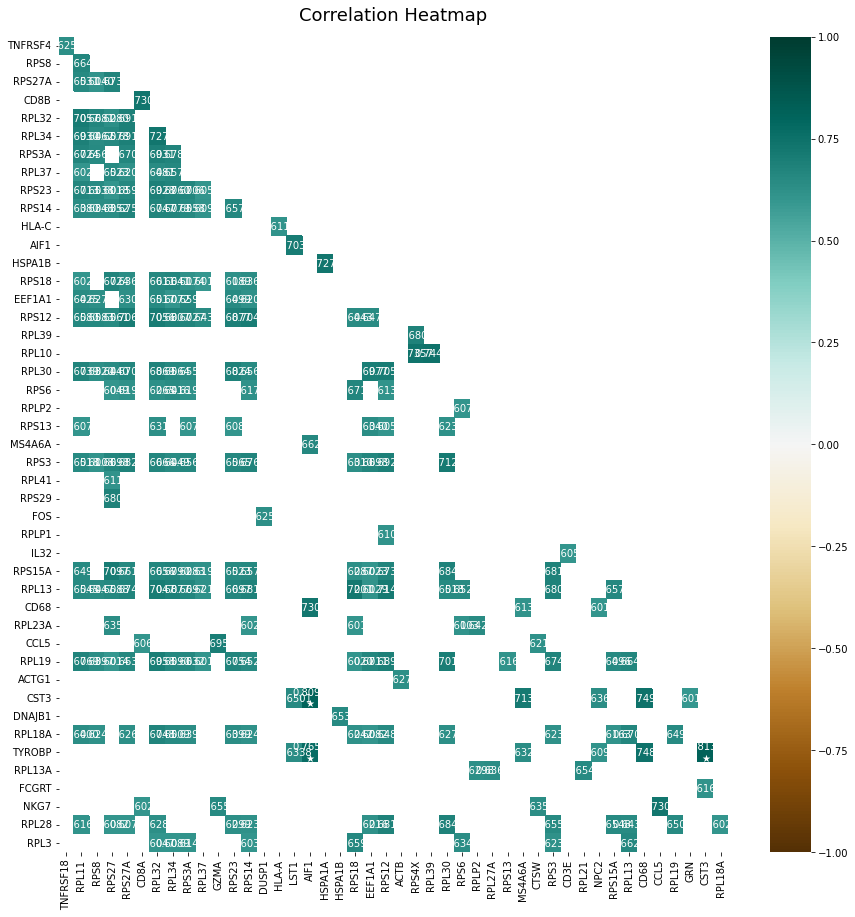

In [ ]:
corr = correlation
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.6  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
plt.title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.savefig('heatmap_6.png')
plt.savefig('heatmap_6.pdf')
plt.show()

### cut off: 0.7

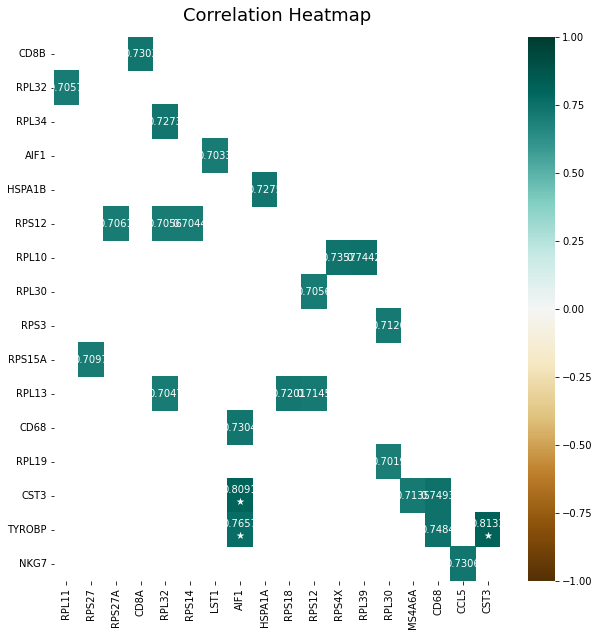

In [ ]:
corr = correlation
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.7  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
plt.title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.savefig('heatmap_7.png')
plt.savefig('heatmap_7.pdf')
plt.show()

### cut off: 0.75

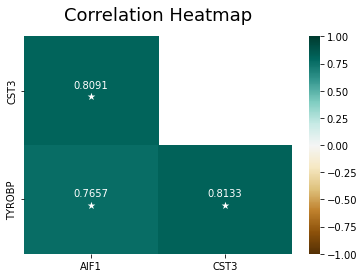

In [ ]:
corr = correlation
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.75  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.savefig('heatmap_75.png')
plt.savefig('heatmap_75.pdf')
plt.show()
